Mean Squared Error: 9.619645319352821e-05
                     time  bid_price_avg      MA5     MA10
9     2023-12-04T09:21:35         455.76  455.746  273.441
10    2023-12-04T09:21:40         455.80  455.764  319.021
11    2023-12-04T09:21:45         455.79  455.774  364.600
12    2023-12-04T09:21:50         455.78  455.780  410.178
13    2023-12-04T09:21:55         455.77  455.780  455.755
...                   ...            ...      ...      ...
7124  2023-12-04T19:14:30         455.98  455.980  455.980
7125  2023-12-04T19:14:35         455.98  455.980  455.980
7126  2023-12-04T19:14:40         455.98  455.980  455.980
7127  2023-12-04T19:14:45         455.98  455.980  455.980
7128  2023-12-04T19:14:50         455.98  455.980  455.980

[7120 rows x 4 columns]


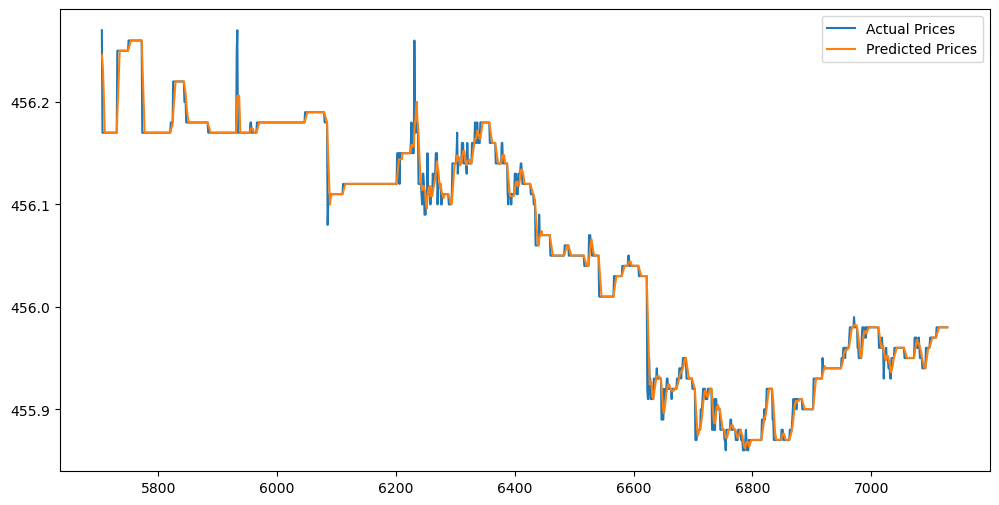

In [6]:
import numpy as np
%matplotlib inline
from datascience import *
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_csv("/Users/michaelwalker/Downloads/aksjdk/20231204/SPY-STK.csv")
data_bid_avg = Table().with_columns('time', df['time'], 'bid_price_avg', (df['bid_price_high'] + df['bid_price_high'])/2)
data = data_bid_avg.to_df() # turns table to df

data['MA5'] = data['bid_price_avg'].rolling(window=5).mean()
data['MA10'] = data['bid_price_avg'].rolling(window=10).mean()

data = data.dropna()

X = data[['MA5', 'MA10']].values
y = data['bid_price_avg'].values

split = int((.8)*len(data))

X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(data)
plt.figure(figsize=(12,6))
plt.plot(data.index[split:], y_test, label = "Actual Prices")
plt.plot(data.index[split:], predictions, label='Predicted Prices')
plt.legend()
plt.show()